# Watershed Algorithm

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
def display(img,cmap=None):
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap=cmap)

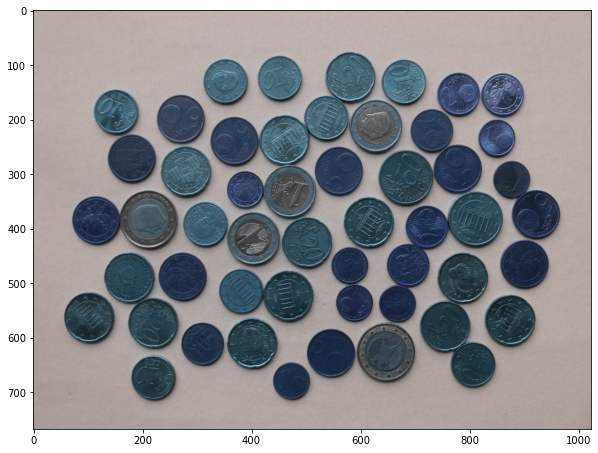

In [3]:
coins = cv2.imread('../images/pennies.jpeg')
display(coins)

## Naive Approach

### Median Blur

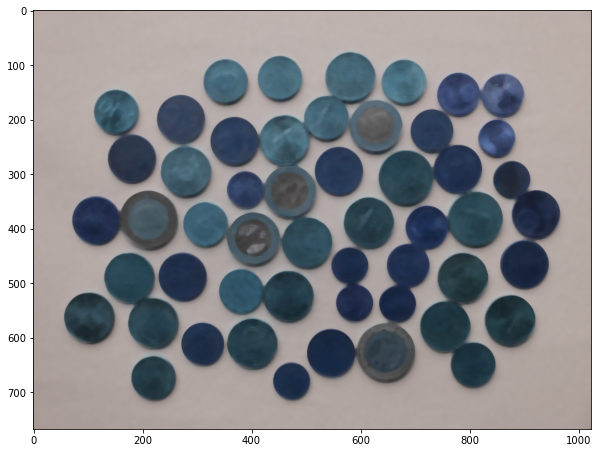

In [4]:
blur = cv2.medianBlur(coins, 9)
display(blur)

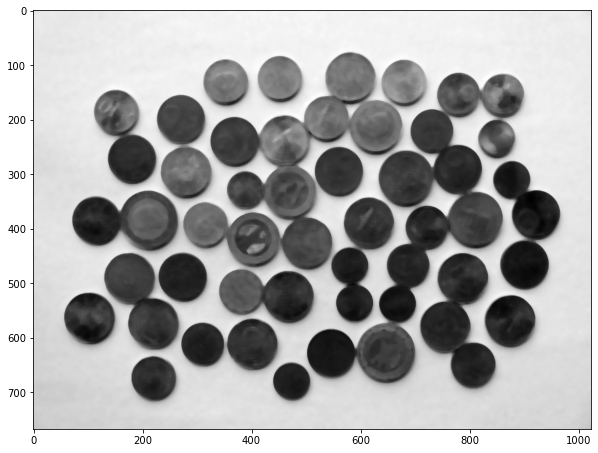

In [5]:
gray_coins = cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY)
display(gray_coins, cmap = 'gray')

### Binary Threshold

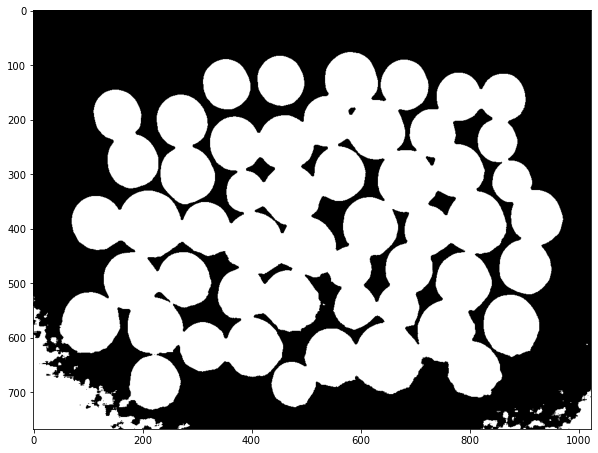

In [6]:
ret, thresh = cv2.threshold(gray_coins, 160, 255, cv2.THRESH_BINARY_INV)
display(thresh, cmap = 'gray')

### Finding Contours

In [7]:
contours, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

In [8]:
for i in range(len(contours)):
    
    if hierarchy[0][i][3] == -1:
        
        cv2.drawContours(coins, contours, i, (255, 0, 0), 10)

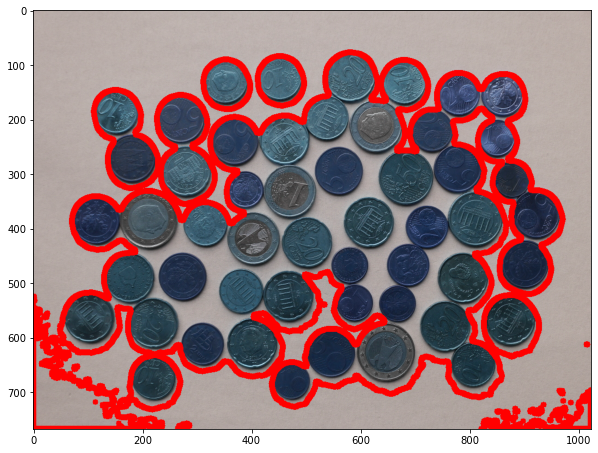

In [9]:
display(coins)

## Watershed Algorithm

In [10]:
img = cv2.imread('../images/pennies.jpeg')

In [11]:
img = cv2.medianBlur(img, 15)

In [12]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

### Otsu's Method

In [13]:
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

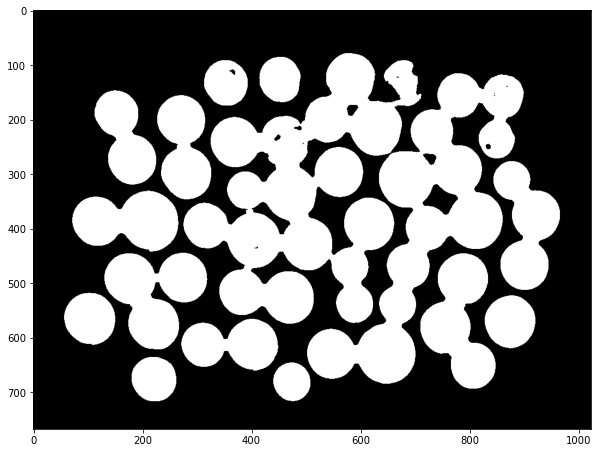

In [14]:
display(thresh, cmap='gray')

#### Noise Removal

In [15]:
kernel = np.ones((3,3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations = 2)

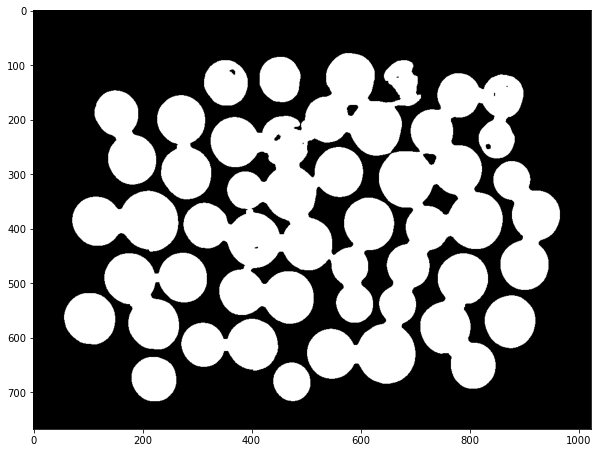

In [16]:
display(opening, cmap= 'gray')

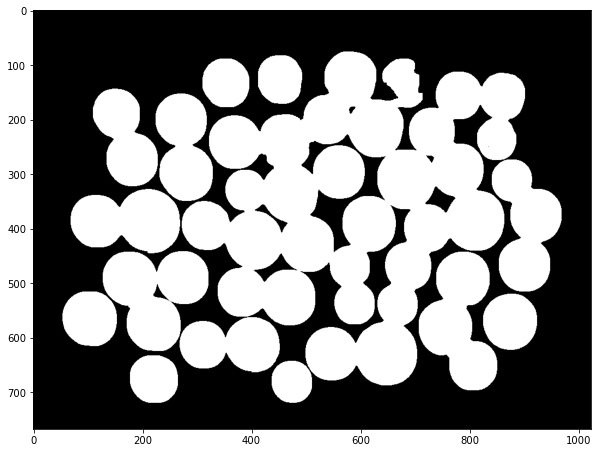

In [17]:
sure_bg = cv2.dilate(opening, kernel, iterations=3)
display(sure_bg, cmap='gray')

In [18]:
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

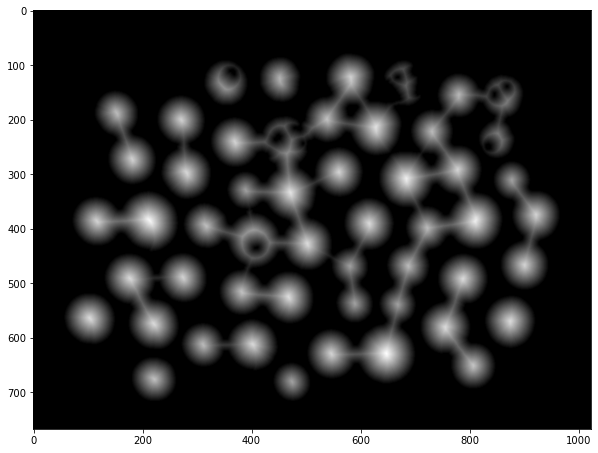

In [19]:
display(dist_transform, cmap='gray')

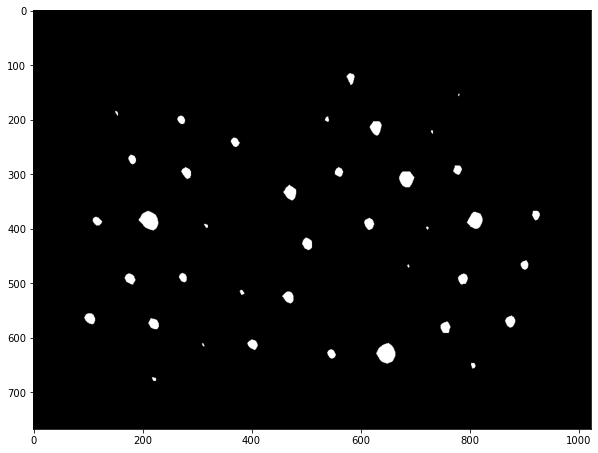

In [20]:
display(sure_fg, cmap='gray')

In [21]:
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

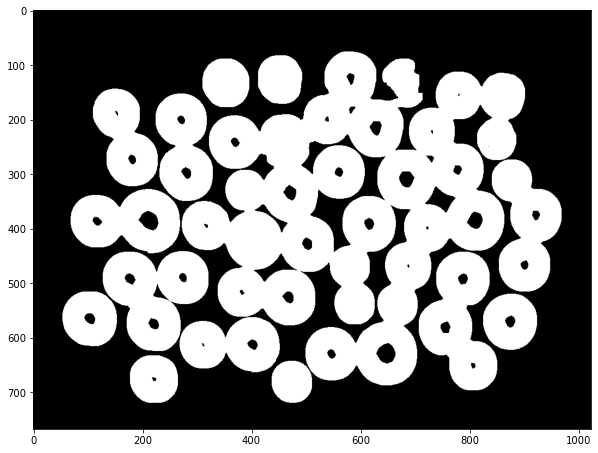

In [22]:
display(unknown, cmap='gray')

In [23]:
ret, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1
markers[unknown == 255] = 0

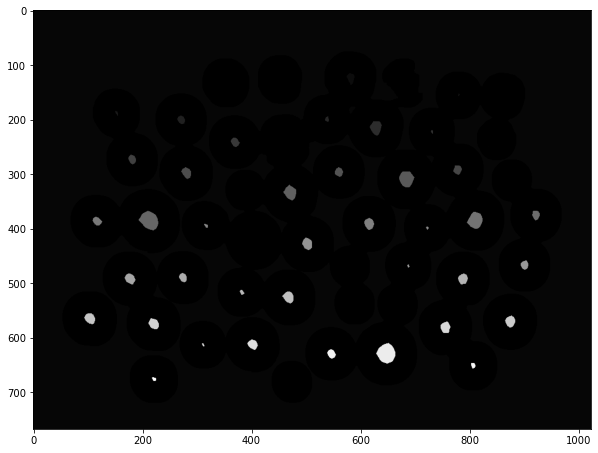

In [24]:
display(markers, cmap='gray')

#### Apply Watershed

In [25]:
markers = cv2.watershed(img,markers)

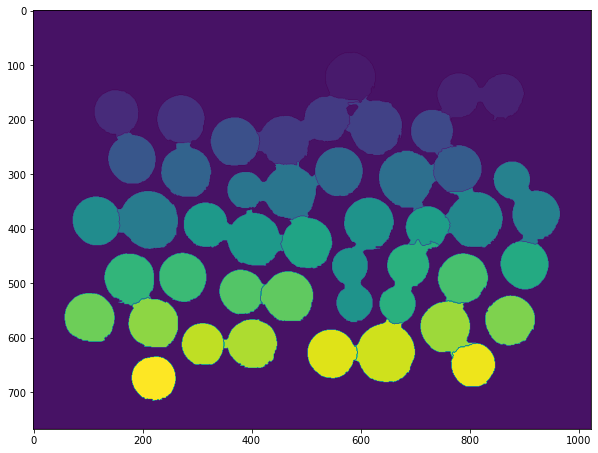

In [26]:
display(markers)

In [27]:
coins = cv2.imread('../images/pennies.jpeg')

In [28]:
contours, hierarchy = cv2.findContours(markers.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

for i in range(len(contours)):
    
    if hierarchy[0][i][3] == -1:
        
        cv2.drawContours(coins, contours, i, (255, 0, 0), 10)

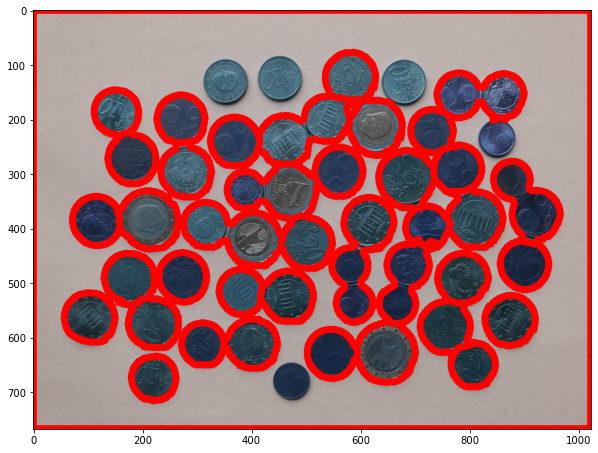

In [29]:
display(coins)